# Telco Churn Project

## Goals: 
- To discover main drivers of churn
- Create a ML program to predict churn with at least an 80% accuracy

In [24]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import acquire
from env import get_connection
from prepare import train_val_test
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import functions as f

## Acquire

- Data acquired from Telco database
- Each row represents a customer
- Each column represents a information about the customer or services included

## Prepare

### Prepare Actions:

- Removed columns that did not contain useful information
- Removed null values
- Checked that column data types were appropriate
- Split data into train, validate and test (approx. 70/15/15), stratifying on 'churn'


## Data Dictionary 

| Feature | Description |  
| :--- | :--- |  
| churn | When a customer cancels contract or subscription with the company |
| contract_type | The type of contract that the customer has with Telco |
| payment_type | The form in which the customer pays their monthly bill |
| dependents | Whether or not the customer has a dependent on their account |
| monthly_charges | How much a customer pays per month |
| tenure | How long a customer has been with the company |
| total_charges | How much a customer has paid over their entire tenure |
| payment_type_id | Number assignments for stats purposes |
| contract_type_id | Number assignments for stats purposes |

In [25]:
# acquiring and cleaning data
telco = f.telco_prep('df')

# splitting data into train, validate, and test
train, val, test, X_train, y_train, X_val, y_val, X_test, y_test = f.split_data(telco, 'churn')


In [26]:
# brief look at the data 
train.head()

,payment_type_id,contract_type_id,dependents,tenure,monthly_charges,total_charges,churn,contract_type,payment_type
5609,1,1,No,14,76.45,1117.55,No,Month-to-month,Electronic check
2209,2,2,No,5,70.00,347.40,Yes,One year,Mailed check
6919,1,1,No,35,75.20,2576.20,Yes,Month-to-month,Electronic check
2284,1,3,No,58,86.10,4890.50,No,Two year,Electronic check
845,2,1,No,2,49.60,114.70,Yes,Month-to-month,Mailed check


## Using a chi2 test to determine the main drivers behind the churn at Telco 

**Which payment type has the highest churn rate?**

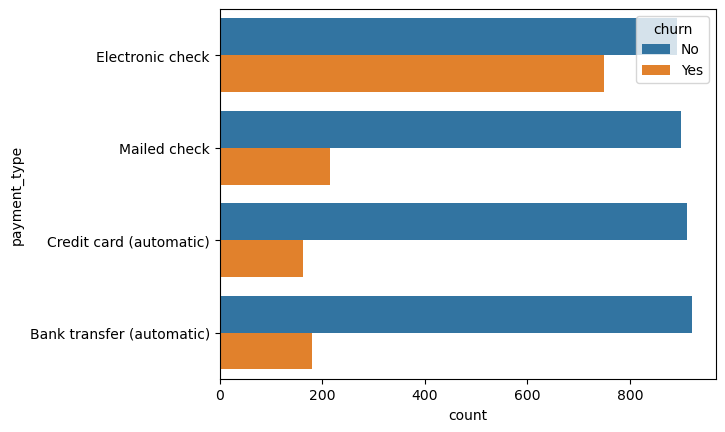

In [27]:
# Visualization of payment type hued with churn rate.
f.payment_plot(train, 'payment_type', 'churn')

- determining if payment type and churn are related
- confidence interval of 95%
- alpha of .05

**Ho: Churn and Payment type are independent of one another**  
**Ha: Churn and payment type are related**

In [28]:
# chi-squared test of payment type
f.chi2('payment_type_id', train)

Comparing relationship between churn and payment_type_id
467.1218774885944 6.35850529852611e-101
------------------


The p-value is lower than the alpha so the churn rate and payment type are related

**Which contract type has the highest churn rate?**

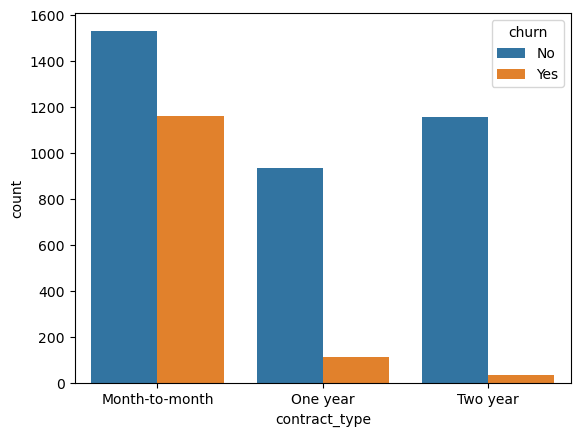

In [29]:
# Visualizing churn rate hued on contract type
f.contract_plot(train, 'contract_type', 'churn')

- determining if contract type and churn are related
- confidence interval of 95%
- alpha of .05

**Ho: Churn and Contract type are independent of one another**  
**Ha: Churn and Contract type are related**

In [7]:
# chi-squared test of contract type
f.chi2('contract_type_id', train)

Comparing relationship between churn and contract_type_id
857.5521456703501 6.094212526763626e-187
------------------


The p-value is lower than the alpha so the churn rate and contract type are related

**Do those with dependents churn more than those without?**

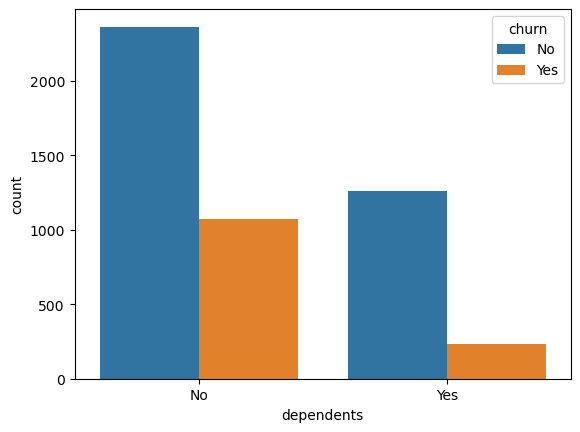

In [8]:
# Visualizing churn rate based on having dependents
f.dependents_plot(train, 'dependents', 'churn')

- determining if having dependents and churn are related
- confidence interval of 95%
- alpha of .05

**Ho: Churn and having dependents are independent of one another**  
**Ha: Churn and having dependents are related**

In [9]:
# chi-squared test of dependents
f.chi2('dependents', train)

Comparing relationship between churn and dependents
127.52149549413217 1.4284535276057882e-29
------------------


The p-value is lower than the alpha so the churn rate and having dependents are related

## Using t-test to determine significance of monthly charges

**Do those with higher monthly payments churn more often than those with lower payments?**

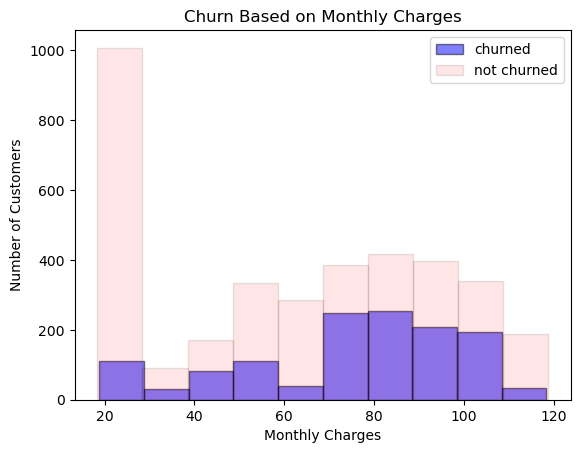

In [10]:
# Visulazing churn rate based on monthly charges
f.monthly_charges_hist(train, 'churn', 'monthly_charges', 'red', 'blue', 
                        .5, .1, 'black', 'churned', 'did not churn', 'Monthly Charges', 
                       'Amount of Customers', 'Churn Based on Monthly Charges')

- determining if monthly chargesand churn are related
- confidence interval of 95%
- alpha of .05

**Ho: Churn and monthly charges are independent of one another**  
**Ha: Churn and monthly charges are related**

In [11]:
# t-test for monthly charges
f.t_test('monthly_charges', telco)

Comparing relationship between churn and monthly_charges
18.407526676414673 8.59244933154705e-73
------------------


**The p-value is lower than the alpha so we can assume there is relationship between monthly charges and churn rate.**

## Exploration Summary
- Payment Types were found to be a driver of Churn
- Contract types were found to be a driver of Churn 
- Having depenents were found to be a driver of Churn 
- Monthly charges were found to be a driver of Churn 

## Features im moving to modeling with
- Payment types (proved to be related to churn)
- Contract types (proved to be related to churn)
- Dependent status (proved to be related to churn)
- Monthly charges (proved to be related to churn)

## Modeling
- I will be using accuracy as my evaluation metric
- By guessing no for whether every customer will churn, one could achieve and accuracy of 73%
- 73% will be my baseline

In [31]:
# converting dependents column to numbered
telco['dependents'] = f.change_int(telco, 'dependents')

In [32]:
# droping contract type and payment type columns
telco = f.drop_cols(telco, 'contract_type', 'payment_type', 1)

In [33]:
# splitting data into train, validate and test sets
train, val, test, X_train, y_train, X_val, y_val, X_test, y_test = f.split_data(telco, 'churn')

## Descision Tree

In [34]:
# Descision tree accuracy of train set
f.tree_score(X_train, y_train, 6)

0.8089249492900609

In [35]:
# Descision tree accuracy of validate set
f.tree_score(X_val, y_val, 6)

0.7935606060606061

- Accuracy is slightly better on the train set vs the validate set

## Random Forest Tree

In [36]:
# Random forest tree accuracy of train set
f.rfc_score(X_train, y_train, 6)

0.8129817444219067

In [37]:
# Random forest tree accuracy of validate set
f.rfc_score(X_val, y_val, 6)

0.8020833333333334

- Accuracy is slightly better on the train set vs the validate set

## Logistic Regression

In [38]:
# Logistic Regression accuracy of train set
f.log_reg_score(X_train, y_train, 1)

0.7943204868154158

In [39]:
# Logistic Regression accuracy of validate set
f.log_reg_score(X_val, y_val, 1)

0.790719696969697

- Accuracy is about the same for both sets

## Comparing Models

- Decision Tree, Random Forest, and Logistic Regression models all performed about equal to baseline on train and validate
- Because the results of the Decision Tree, Random Forest, and Logistic Regression models were all very similar I could proceed to test with any of these models.
- I have chosen to move forward with the Random Forest Tree model

## Random Forest Tree Test

In [41]:
# Random forest tree accuracy of Test set
f.rfc_score(X_test, y_test, 6)

0.7814569536423841

## Modeling Summary
- The Decision Tree, Random Forest Tree and Logisitic Regression all performed about the same
- The Random Forest Tree performed slightly better on the validate sets and outperformed the baseline on the test set.

## Conclusions

### Exploration
- Customers with month to month contracts have a significantly higher chance of churning versus other contract types.
- Customers who pay with an electronic check have a significantly higher chance of churning versus other forms of payment.
- Customers who have dependents have a moderately higher chance of churning versus those who do not.
- Customers who's monthly payments are higher have a moderatly higher chance of churning.

### Modeling
**The final model out performed the baseline with an accuracy of 78%**
- I believe my model will perform very well for determining which customers will churn in the future.

## Recommendations

- Those with monthly charges of 70 or higher have a much greater chance of churning. Offer deals or decrease price of add-ons to keep customer monthly cost at or below 70
- Those with dependents have a higher churn rate than those without. Most likely due to having to open multiple lines and increasing costs. Create a deal where those with multiple lines have a decrease cost per line. 